Import country data

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import geopandas as gpd

Načíst data + přejmenovat sloupce

In [18]:
df = pd.read_excel("CountryData.xlsx", sheet_name = "data")
df.columns = ["Country", "CountryName", "ForeignInvestment", "ElectricityAccess", "RenewableEnergy", "CO2Emission", "Inflation", "MobileSubscriptions", "InternetUse", "Exports", "Imports", "GDP", "MortalityMale", "MortalityFemale", "BirthRate", "DeathRate", "MortalityInfant", "LifeExpectancy", "FertilityRate", "PopulationGrowth", "UrbanPopulation"]
df.head()

,Country,CountryName,ForeignInvestment,ElectricityAccess,RenewableEnergy,CO2Emission,Inflation,MobileSubscriptions,InternetUse,Exports,...,GDP,MortalityMale,MortalityFemale,BirthRate,DeathRate,MortalityInfant,LifeExpectancy,FertilityRate,PopulationGrowth,UrbanPopulation
0,ABW,Aruba,7.568160,93.356292,5.464716,24.670529,2.077739,129.636369,62.0,61.502448,...,24271.940421,76.722,123.598,11.260,7.919,NaN,75.016,1.776,0.212680,43.059
1,AFG,Afghanistan,0.340097,42.700000,14.839806,0.293837,0.892537,35.467766,4.0,10.023850,...,553.300289,228.971,271.299,39.232,8.095,65.7,61.226,5.816,2.812617,24.689
2,AGO,Angola,-3.913151,33.514950,54.193837,1.243406,14.470541,40.238403,2.8,62.387739,...,3529.053482,233.617,306.825,45.314,10.450,75.4,58.192,6.162,3.570099,40.097
3,ALB,Albania,9.137790,100.000000,37.115330,1.578574,3.552267,91.560929,45.0,27.979471,...,4094.358832,55.601,92.752,11.819,6.776,14.8,76.652,1.653,-0.496462,52.163
4,ARE,United Arab Emirates,3.034620,100.000000,0.108122,19.443690,0.878937,132.105386,68.0,77.713035,...,35049.148317,61.349,87.243,11.656,1.474,7.3,76.344,1.869,7.587098,84.055


Úkol 1: Zkontrolovat chybějící (na) hodnoty

In [19]:
df.describe()

,ForeignInvestment,ElectricityAccess,RenewableEnergy,CO2Emission,Inflation,MobileSubscriptions,InternetUse,Exports,Imports,GDP,MortalityMale,MortalityFemale,BirthRate,DeathRate,MortalityInfant,LifeExpectancy,FertilityRate,PopulationGrowth,UrbanPopulation
count,186.000000,192.000000,191.000000,188.000000,182.000000,190.000000,190.000000,185.000000,185.000000,191.000000,188.000000,188.000000,191.000000,191.000000,185.000000,189.000000,189.000000,192.000000,192.000000
mean,5.881855,78.240748,31.659505,4.878105,4.530093,89.254314,33.096221,43.544808,49.253265,13364.505839,144.701755,211.737206,22.335292,8.093897,27.860479,70.236538,2.933369,1.515959,56.408858
std,10.987837,30.941098,29.841833,6.445062,4.022375,42.274774,27.196408,34.734561,31.831732,18779.182547,102.842843,108.237023,10.826970,2.989552,24.726669,8.621780,1.485316,1.553161,23.911640
min,-15.989220,1.500000,0.000000,0.024260,-2.425257,1.184307,0.250000,0.109124,0.065880,231.194326,28.711000,68.677000,8.300000,1.474000,2.000000,47.560000,1.061000,-2.096943,9.092000
25%,1.494193,59.431767,5.605296,0.607425,1.708852,58.284768,8.000000,23.787730,30.726893,1335.880438,70.858750,122.078250,12.490000,5.920500,7.500000,64.357000,1.790000,0.486472,36.142250
50%,3.070926,97.948985,21.736052,2.501276,3.513100,92.274142,28.680000,36.845606,43.326791,5022.493191,108.179500,197.736000,20.580000,7.534000,17.700000,72.649000,2.412000,1.289291,56.266000
75%,6.772782,100.000000,52.986989,6.525163,6.383420,117.650532,53.225000,51.554323,59.520935,16279.821690,197.061750,274.843250,30.045000,9.862500,44.100000,76.246341,3.913000,2.333933,75.705500
max,105.785197,100.000000,96.827822,40.742018,28.187465,208.999216,93.390000,298.340631,284.973496,104965.306078,508.157000,588.836000,50.034000,16.572000,106.700000,82.978049,7.487000,11.220686,100.000000


In [20]:
df.isna().sum()

,0
Country,0
CountryName,0
ForeignInvestment,6
ElectricityAccess,0
RenewableEnergy,1
CO2Emission,4
Inflation,10
MobileSubscriptions,2
InternetUse,2
Exports,7


Úkol 2: Doplnit chybějící hodnoty (např. průměrem daného sloupce)

In [21]:
# Convert 'NaN' string to actual NaN values in the rest of the DataFrame
df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

# Replace NaN values with the mean of the column
X = df.iloc[:, 2:].fillna(df.iloc[:, 2:].mean())

In [22]:
df

,Country,CountryName,ForeignInvestment,ElectricityAccess,RenewableEnergy,CO2Emission,Inflation,MobileSubscriptions,InternetUse,Exports,...,GDP,MortalityMale,MortalityFemale,BirthRate,DeathRate,MortalityInfant,LifeExpectancy,FertilityRate,PopulationGrowth,UrbanPopulation
0,ABW,Aruba,7.568160,93.356292,5.464716,24.670529,2.077739,129.636369,62.00,61.502448,...,24271.940421,76.722,123.598,11.260,7.919,NaN,75.016,1.776,0.212680,43.059
1,AFG,Afghanistan,0.340097,42.700000,14.839806,0.293837,0.892537,35.467766,4.00,10.023850,...,553.300289,228.971,271.299,39.232,8.095,65.7,61.226,5.816,2.812617,24.689
2,AGO,Angola,-3.913151,33.514950,54.193837,1.243406,14.470541,40.238403,2.80,62.387739,...,3529.053482,233.617,306.825,45.314,10.450,75.4,58.192,6.162,3.570099,40.097
3,ALB,Albania,9.137790,100.000000,37.115330,1.578574,3.552267,91.560929,45.00,27.979471,...,4094.358832,55.601,92.752,11.819,6.776,14.8,76.652,1.653,-0.496462,52.163
4,ARE,United Arab Emirates,3.034620,100.000000,0.108122,19.443690,0.878937,132.105386,68.00,77.713035,...,35049.148317,61.349,87.243,11.656,1.474,7.3,76.344,1.869,7.587098,84.055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,WSM,Samoa,-0.205985,96.606010,46.754670,1.004361,0.777007,48.333826,7.00,29.217341,...,3453.434298,95.780,162.335,27.910,5.281,16.2,73.122,4.338,0.743338,20.078
188,YEM,"Yemen, Rep.",0.610358,63.134281,0.963571,0.992602,11.174834,46.956851,12.35,29.995078,...,1309.231960,212.045,258.094,34.548,7.088,43.8,63.508,4.674,2.713034,31.732
189,ZAF,South Africa,0.984090,82.900000,17.079802,9.190699,4.257416,97.649179,24.00,28.615237,...,7275.382112,388.943,509.854,22.510,12.997,37.3,55.888,2.588,1.197113,62.218
190,ZMB,Zambia,8.533198,22.000000,92.104297,0.194337,8.501761,39.328361,10.00,37.025939,...,1463.213573,344.897,420.842,40.361,10.144,53.6,56.588,5.397,2.883152,38.725


Úkol 3: Standardizovat data

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.15634666,  0.48980361, -0.88239537, ..., -0.78745295,
        -0.84130728, -0.55975916],
       [-0.51380711, -1.1516613 , -0.56658691, ...,  1.96128953,
         0.83703345, -1.33001274],
       [-0.90814926, -1.44929338,  0.75908951, ...,  2.19670164,
         1.32601162, -0.68395573],
       ...,
       [-0.45409892,  0.15097825, -0.49113059, ..., -0.23498292,
        -0.20582522,  0.24357717],
       [ 0.24582068, -1.82242346,  2.03613797, ...,  1.67620956,
         0.8825662 , -0.74148366],
       [-0.43327226, -1.3667246 ,  1.72539364, ...,  0.74476687,
         0.29745898, -0.97331447]])

Úkol 4: Aplikovat shlukovací algoritmus na škálované proměnné, přiřadit label každé zemi, odpovídající shluku, ke které byla přiřazena.

přiřadit label k původním datům pomocí \
data["label"] = y_pred


In [24]:
# Clustering (k-means), 7 clusters
cluster_quantity = range(1, 8)
# Inertia (SSE - sum of squared errors, the lower the better)
inertias = []
for k in cluster_quantity:
    model = KMeans(n_clusters=k, n_init="auto")
    model.fit(X_scaled)
    inertias.append(model.inertia_)

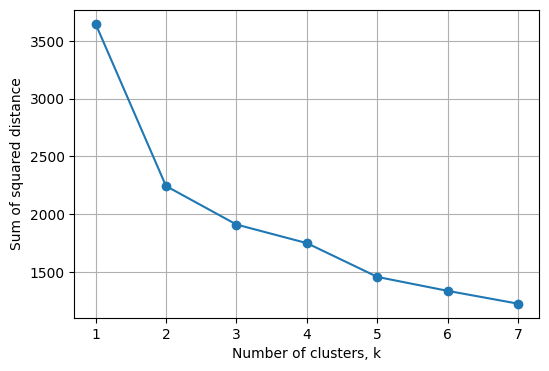

In [25]:
# Creating plot and choosing the most suitable number of clusters
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(cluster_quantity, inertias, "-o")
ax.set_xlabel("Number of clusters, k")
ax.set_ylabel("Sum of squared distance") # SSE
ax.grid(True)
plt.show()

In [26]:
# Perform clustering with k-means and calculate silhouette score
kmeans = KMeans(n_clusters=3, n_init="auto")  # choice of number of clusters, test with different number of clusters
y_pred = kmeans.fit_predict(X_scaled)

# Calculate the silhouette score
score = silhouette_score(X_scaled, y_pred)

print(f"Silhouette Score: {score}")

Silhouette Score: 0.23796202411294218


In [ ]:
# Perform clustering with k-means and calculate silhouette score
kmeans = KMeans(n_clusters=4, n_init="auto")  # choice of number of clusters, test with different number of clusters
y_pred = kmeans.fit_predict(X_scaled)

# Calculate the silhouette score
score = silhouette_score(X_scaled, y_pred)

print(f"Silhouette Score: {score}")

Silhouette Score: 0.38694104154427816


Average silhouette score: 0.551191604619592


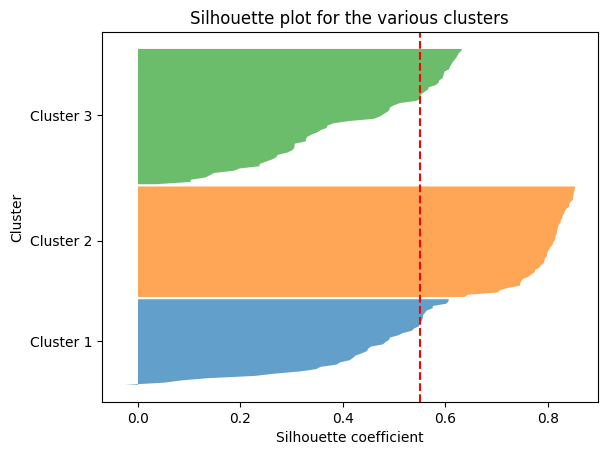

In [ ]:
# Load dataset
df = load_iris()
X = df.data

# Number of clusters
n_clusters = 3

# Initialize the K-means clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Calculate the silhouette score for each sample
silhouette_vals = silhouette_samples(X, cluster_labels)

# Calculate the average silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f'Average silhouette score: {silhouette_avg}')

# Plotting the silhouette scores for each sample
y_lower, y_upper = 0, 0
yticks = []

for i in range(n_clusters):
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()
    y_upper += len(ith_cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      alpha=0.7)
    yticks.append((y_lower + y_upper) / 2)
    y_lower += len(ith_cluster_silhouette_vals)

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, [f'Cluster {i+1}' for i in range(n_clusters)])
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')
plt.title('Silhouette plot for the various clusters')
plt.show()

In [27]:
# přiřadit label k původním datům
df["label"] = y_pred

In [31]:
# Load world map
# URL to the ZIP file containing the shapefile
!wget https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip -O ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip -d ne_110m_admin_0_countries
# Load the shapefile
world = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
# Merge data with the world map
world = world.merge(df, left_on='ISO_A3_EH', right_on='Country', how='left')

--2025-02-10 19:02:43--  https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip
Resolving naciscdn.org (naciscdn.org)... 18.244.202.58, 18.244.202.61, 18.244.202.16, ...
Connecting to naciscdn.org (naciscdn.org)|18.244.202.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K  --.-KB/s    in 0.04s   

2025-02-10 19:02:43 (4.92 MB/s) - ‘ne_110m_admin_0_countries.zip’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
replace ne_110m_admin_0_countries/ne_110m_admin_0_countries.README.html? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ne_110m_admin_0_countries/ne_110m_admin_0_countries.README.html  
 extracting: ne_110m_admin_0_countries/ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countries/ne_110m_admin_0_countries.cpg  
  inflating: ne_110m_admin_0_countries/ne_110m_ad

Úkol 5: Vizualizovat výsledky

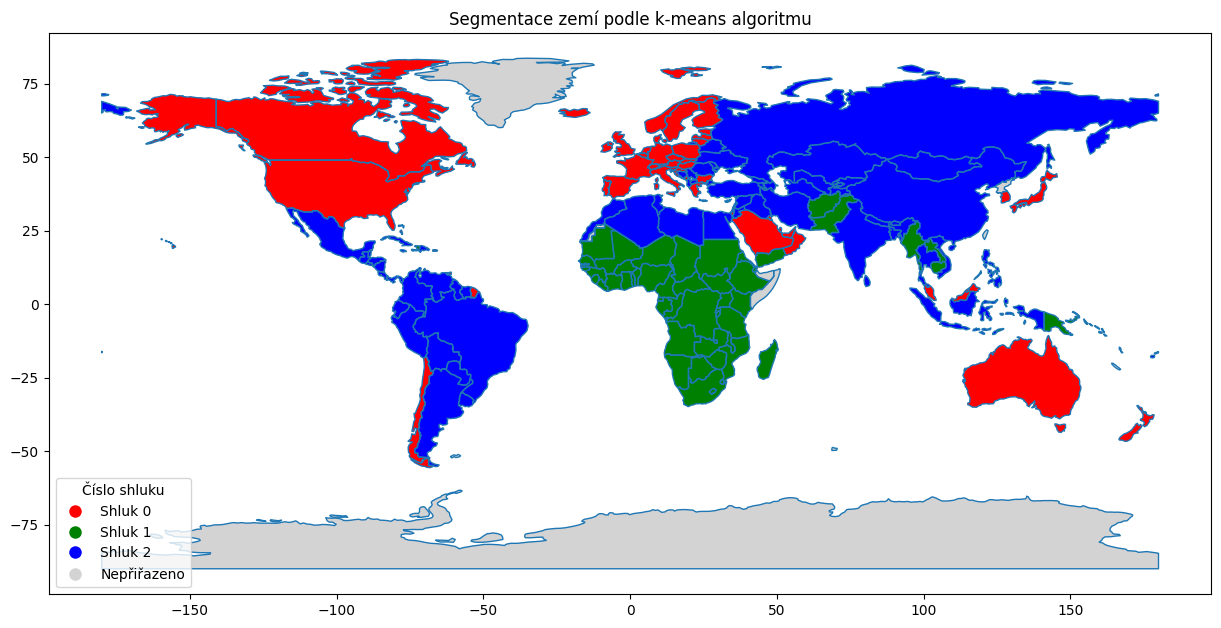

In [34]:
cluster_labels = np.unique(y_pred)
colors = ["red", "green", "blue"]

# Map clusters to colors
color_map = {cluster: colors[i] for i, cluster in enumerate(cluster_labels)}

# Assign colors to countries based on cluster labels, default to gray if NaN
world['color'] = world['label'].map(color_map).fillna('lightgray')

# Plot the map with clusters
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(color=world['color'], ax=ax, legend=False)

# Create custom legend
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[cluster], markersize=10, label=f'Shluk {int(cluster)}') for cluster in cluster_labels]
legend_handles.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgray', markersize=10, label='Nepřiřazeno'))
ax.legend(handles=legend_handles, title="Číslo shluku", loc='lower left')

# Add title
plt.title('Segmentace zemí podle k-means algoritmu')

# Show plot
plt.show()


Úkol 6 Interpretovat výsledky - k jaké segmentaci došlo? Očekávali bychom jiné rozdělení?

Úkol 7: Zkuste aplikovat jiný algoritmus. Jak se změnily výsledky?

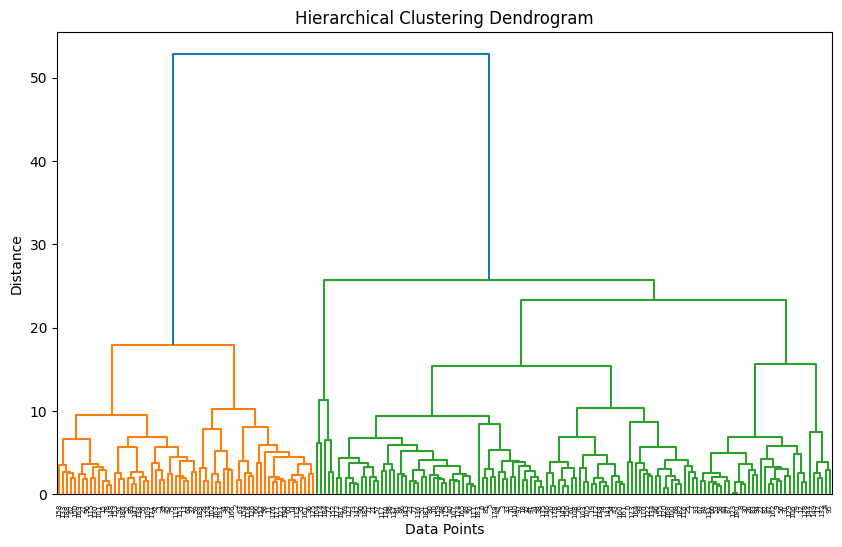

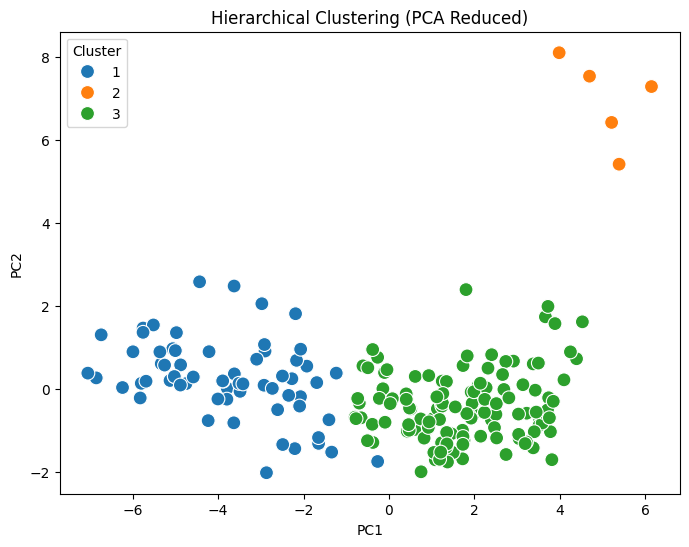

In [35]:
# Hierarchical clustering
# two closed objects, 'complete'= 2 farthest objects, 'average'= arithmetic mean of all, 'centroid' = geometric mean of all, 'median', 'ward' based on the sum of squares

# Perform Hierarchical Clustering
Z = linkage(X_scaled, method='ward')  # 'ward' minimizes variance

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Cut the dendrogram to create 3 clusters (change '3' if needed)
clusters = fcluster(Z, t=3, criterion='maxclust')

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for plotting
df_plot = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_plot["Cluster"] = clusters

# Scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x="PC1", y="PC2", hue="Cluster", palette="tab10", s=100)
plt.title("Hierarchical Clustering (PCA Reduced)")
plt.show()

Key Adjustments for Your Case:
- No scaling is applied since X_scaled is already prepared.
- The dendrogram helps visualize how clusters form.
- The number of clusters (t=3) can be adjusted based on your needs.
PCA reduces x dimensions to 2D for visualization.

Úkol 8: Aplikujte PCA na škálované proměnné. Kolik variability je vysvětleno prvními 2 komponentami?

Principal Component Analysis (PCA): PCA is a technique used for reducing the dimensionality of large datasets while preserving as much variance as possible. It transforms the original variables into a new set of uncorrelated variables called principal components.

Purpose: It's commonly used to simplify data, speed up machine learning algorithms, and visualize high-dimensional data.

Scree Plot: This is a graphical representation used in PCA to display the variance explained by each principal component. It plots the eigenvalues (variance) of each principal component in descending order.

Purpose: It's helpful in determining the optimal number of principal components to retain. Typically, you look for an "elbow" point in the plot, where the explained variance starts to level off. This indicates the point where adding more components yields diminishing returns.

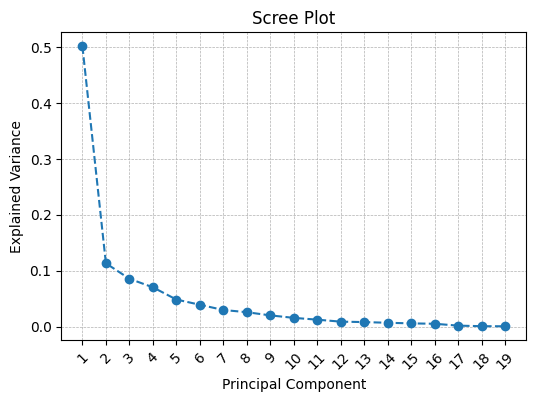

In [46]:
# PCA model
model = PCA()
pca_features = model.fit_transform(X_scaled)
explained_variance = model.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="--")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("Scree Plot")
plt.xticks(ticks=np.arange(1, len(explained_variance) + 1), rotation=45)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

Úkol 9: Vizualizujte scatterplot bodů PCA1 vs PCA2. Vybarvěte body podle přiřazeného shluku.

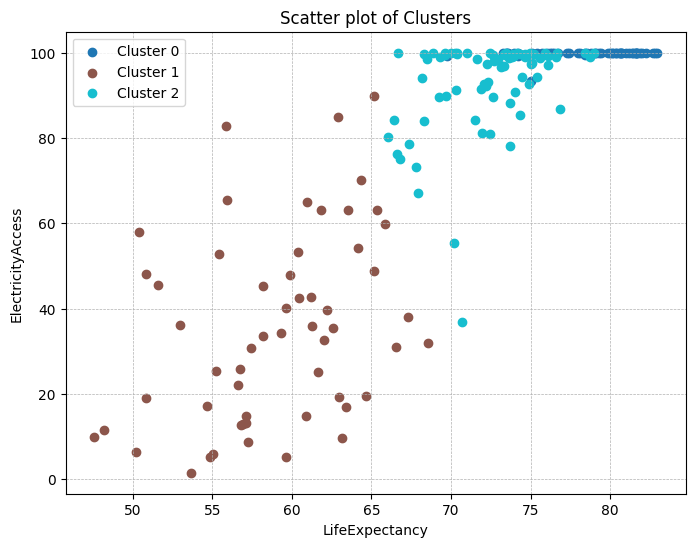

In [53]:
# Extract the labels
labels = df["label"]

unique_labels = np.unique(labels)
cmap = plt.get_cmap("tab10", len(unique_labels))
colors = sns.color_palette("colorblind", len(unique_labels))

# Create scatterplot
plt.figure(figsize=(8, 6))

for label in unique_labels:
    plt.scatter(
        x=df[df["label"] == label]["LifeExpectancy"],  # Replace "A" with your relevant feature column
        y=df[df["label"] == label]["ElectricityAccess"],  # Replace "B" with your relevant feature column
        color=cmap(label), label=f'Cluster {label}'
    )

plt.xlabel("LifeExpectancy")
plt.ylabel("ElectricityAccess")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.title("Scatter plot of Clusters")
plt.show()


Úkol 10: S kterými z původních (škálovaných) proměnných je PCA1 silně korelována? To samé pro PCA 2

In [50]:
# Extract PCA1
pca1 = pca_features[:, 0]

# Compute correlations
correlations = np.corrcoef(pca1, X_scaled, rowvar=False)[0, 1:]

# Create a list of tuples (correlation, column name)
correlation_list = [(correlations[i], col) for i, col in enumerate(X.columns)]

# Sort the list of tuples in descending order of correlation
sorted_correlations = sorted(correlation_list, key=lambda x: x[0], reverse=True)

# Print sorted correlations
for corr, col in sorted_correlations:
    print(f"Correlation between PCA1 and {col}: {corr:.2f}")


Correlation between PCA1 and LifeExpectancy: 0.96
Correlation between PCA1 and ElectricityAccess: 0.89
Correlation between PCA1 and InternetUse: 0.86
Correlation between PCA1 and MobileSubscriptions: 0.77
Correlation between PCA1 and UrbanPopulation: 0.73
Correlation between PCA1 and GDP: 0.68
Correlation between PCA1 and CO2Emission: 0.60
Correlation between PCA1 and Exports: 0.40
Correlation between PCA1 and Imports: 0.20
Correlation between PCA1 and ForeignInvestment: 0.17
Correlation between PCA1 and Inflation: -0.32
Correlation between PCA1 and PopulationGrowth: -0.38
Correlation between PCA1 and DeathRate: -0.41
Correlation between PCA1 and RenewableEnergy: -0.77
Correlation between PCA1 and MortalityFemale: -0.83
Correlation between PCA1 and FertilityRate: -0.88
Correlation between PCA1 and MortalityMale: -0.90
Correlation between PCA1 and MortalityInfant: -0.90
Correlation between PCA1 and BirthRate: -0.91


In [51]:
# Extract PCA2
pca2 = pca_features[:, 1]

# Compute correlations
correlations = np.corrcoef(pca2, X_scaled, rowvar=False)[0, 1:]

# Create a list of tuples (correlation, column name)
correlation_list = [(correlations[i], col) for i, col in enumerate(X.columns)]

# Sort the list of tuples in descending order of correlation
sorted_correlations = sorted(correlation_list, key=lambda x: x[0], reverse=True)

# Print sorted correlations
for corr, col in sorted_correlations:
    print(f"Correlation between PCA2 and {col}: {corr:.2f}")

Correlation between PCA2 and Imports: 0.82
Correlation between PCA2 and Exports: 0.81
Correlation between PCA2 and ForeignInvestment: 0.69
Correlation between PCA2 and PopulationGrowth: 0.27
Correlation between PCA2 and GDP: 0.21
Correlation between PCA2 and MortalityInfant: 0.18
Correlation between PCA2 and FertilityRate: 0.17
Correlation between PCA2 and BirthRate: 0.15
Correlation between PCA2 and MortalityMale: 0.15
Correlation between PCA2 and CO2Emission: 0.11
Correlation between PCA2 and UrbanPopulation: 0.09
Correlation between PCA2 and MortalityFemale: 0.06
Correlation between PCA2 and MobileSubscriptions: 0.04
Correlation between PCA2 and InternetUse: 0.02
Correlation between PCA2 and RenewableEnergy: -0.00
Correlation between PCA2 and DeathRate: -0.02
Correlation between PCA2 and LifeExpectancy: -0.11
Correlation between PCA2 and Inflation: -0.19
Correlation between PCA2 and ElectricityAccess: -0.19


Úkol 11: Dokážete interpretovat, jaká charakteristika se skrývá pod PCA1 a PCA2?

In [56]:
# Select columns from the third column onward
# df_new = df.iloc[:, 2:]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA model
model = PCA()
pca_features = model.fit_transform(X_scaled)

# Get the loadings
loadings = model.components_

# Create a DataFrame for loadings
loadings_df = pd.DataFrame(loadings.T, columns=[f'PCA{i+1}' for i in range(loadings.shape[0])], index=df_new.columns)

print("Váhy pro jednotlivé složky (PCA):")
print(loadings_df)

# Identify the most impactful features for PCA1
nejvlivnější_atributy_PCA1 = loadings_df['PCA1'].abs().sort_values(ascending=False)
print("\nNejvlivnější atributy pro PCA1:")
print(nejvlivnější_atributy_PCA1)

# Identify the most impactful features for PCA2
nejvlivnější_atributy_PCA2 = loadings_df['PCA2'].abs().sort_values(ascending=False)
print("\nNejvlivnější atributy pro PCA2:")
print(nejvlivnější_atributy_PCA2)

# Scree plot for explained variance
explained_variance = model.explained_variance_ratio_
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="--")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("Scree Plot")
plt.xticks(ticks=np.arange(1, len(explained_variance) + 1), rotation=45)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

# Cumulative explained variance plot
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(explained_variance), marker="o", linestyle="--")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative Explained Variance")
plt.xticks(ticks=np.arange(1, len(explained_variance) + 1), rotation=45)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

ValueError: Shape of passed values is (19, 19), indices imply (20, 19)